Example notebook showing how to use the MCMC sampler (currently in development)

In [4]:
import os
import sys
import argparse
import torch
from getdist import plots, MCSamples
import getdist
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

In [5]:
path = os.path.realpath(os.path.join(os.getcwd(), '../..'))
sys.path.insert(0, path)

In [6]:
from nnest import MCMCSampler
from nnest.likelihoods import *

In [7]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [8]:
# Likelihood
like = Himmelblau(2)
#like = Rosenbrock(2)
#like = Gaussian(2, 0.9)
#like = Eggbox(2)
#like = GaussianShell(2)
#like = GaussianMix(2)

In [9]:
sampler = MCMCSampler(like.x_dim, like.loglike, hidden_dim=16, num_blocks=3, flow='spline')

Creating directory for new run logs/test/run100
[nnest.trainer] [INFO] SingleSpeedSpline(
  (flow): NormalizingFlow(
    (flows): ModuleList(
      (0): ActNorm()
      (1): Invertible1x1Conv()
      (2): NSF_CL(
        (f1): MLP(
          (net): Sequential(
            (0): Linear(in_features=1, out_features=16, bias=True)
            (1): LeakyReLU(negative_slope=0.2)
            (2): Linear(in_features=16, out_features=16, bias=True)
            (3): LeakyReLU(negative_slope=0.2)
            (4): Linear(in_features=16, out_features=16, bias=True)
            (5): LeakyReLU(negative_slope=0.2)
            (6): Linear(in_features=16, out_features=23, bias=True)
          )
        )
        (f2): MLP(
          (net): Sequential(
            (0): Linear(in_features=1, out_features=16, bias=True)
            (1): LeakyReLU(negative_slope=0.2)
            (2): Linear(in_features=16, out_features=16, bias=True)
            (3): LeakyReLU(negative_slope=0.2)
            (4): Linear(in_f

In [20]:
init_samples = sampler._init_samples(init_scale=8.0)

[nnest.sampler] [INFO] Getting initial samples with emcee
[nnest.sampler] [INFO] Autocorrelation exceeds chain length
[nnest.sampler] [INFO] Mean acceptance fraction: [0.086]


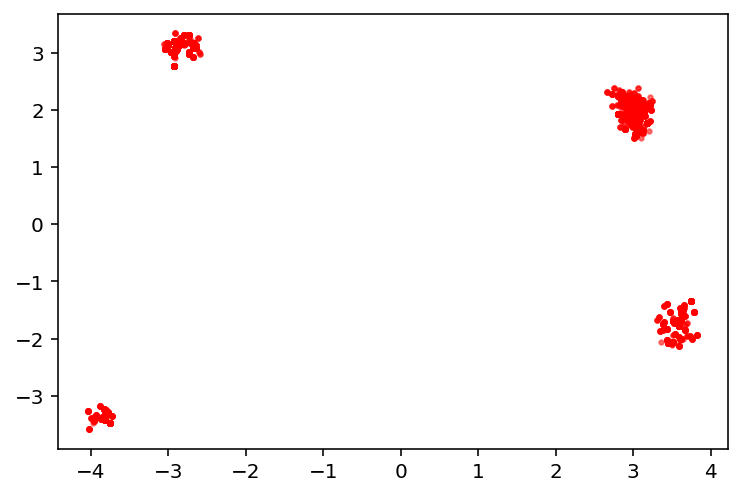

In [21]:
if like.x_dim == 2:
    plt.scatter(init_samples[:, 0], init_samples[:, 1], c='r', s=5, alpha=0.5)
    plt.show()

In [22]:
sampler.run(jitter=0.01, init_samples=init_samples)

[nnest.sampler] [INFO] Alpha [0.7071]
[nnest.trainer] [INFO] Number of training samples [1000]
[nnest.trainer] [INFO] Training jitter [0.0100]
[nnest.trainer] [INFO] Epoch [1] train loss [0.0291] validation loss [0.0302]
[nnest.trainer] [INFO] Epoch [50] train loss [-0.0050] validation loss [-0.0045]
[nnest.trainer] [INFO] Epoch [100] train loss [-0.0155] validation loss [-0.0146]
[nnest.trainer] [INFO] Epoch [150] train loss [-0.0169] validation loss [-0.0167]
[nnest.trainer] [INFO] Epoch [200] train loss [-0.0181] validation loss [-0.0174]
[nnest.trainer] [INFO] Epoch [250] train loss [-0.0183] validation loss [-0.0171]
[nnest.trainer] [INFO] Epoch [300] train loss [-0.0188] validation loss [-0.0176]
[nnest.trainer] [INFO] Epoch [350] train loss [-0.0195] validation loss [-0.0182]
[nnest.trainer] [INFO] Epoch [400] train loss [-0.0196] validation loss [-0.0186]
[nnest.trainer] [INFO] Epoch [450] train loss [-0.0198] validation loss [-0.0188]
[nnest.trainer] [INFO] Epoch [500] train l

[nnest.sampler] [INFO] MCMC step [4600], ncalls [16123] 
[nnest.sampler] [INFO] Acceptance [0.3959] min ESS [177.3485] max ESS [193.6743] average jump distance [0.2597]
[nnest.sampler] [INFO] MCMC step [4800], ncalls [16885] 
[nnest.sampler] [INFO] Acceptance [0.3985] min ESS [188.2981] max ESS [200.3538] average jump distance [0.2605]
[nnest.sampler] [INFO] MCMC step [5000], ncalls [17641] 
[nnest.sampler] [INFO] Acceptance [0.4007] min ESS [199.1854] max ESS [210.3491] average jump distance [0.2619]
ncall: 20789



In [23]:
samples = [sampler.samples[i, :, :].squeeze() for i in range(sampler.samples.shape[0])]
latent_samples = [sampler.latent_samples[i, :, :].squeeze() for i in range(sampler.latent_samples.shape[0])]
loglikes = [sampler.loglikes[i, :].squeeze() for i in range(sampler.loglikes.shape[0])]

In [24]:
mc = MCSamples(samples=samples, loglikes=loglikes)

Removed no burn in


In [25]:
print(mc.getEffectiveSamples())
print(mc.getMargeStats())
print(mc.getConvergeTests())

1056.7366609763578
Marginalized limits: 0.68; 0.95; 0.99

parameter   mean           sddev          lower1         upper1         limit1 lower2         upper2         limit2 lower3         upper3         limit3 
param1      7.4321121E-01  3.1873839E+00 -3.8612669E+00  3.7029374E+00  two   -3.9695740E+00  3.7808219E+00  two   -3.9850131E+00  3.7842831E+00  two     p_{1}
param2      3.2854259E-01  2.4824797E+00 -3.4050519E+00  3.2627143E+00  two   -3.5263101E+00  3.3646905E+00  two   -3.5062518E+00  3.3442148E+00  two     p_{2}

Parameter autocorrelation lengths (effective number of samples N_eff = tot weight/weight length)

            Weight Length   Sample length           N_eff
param1           2.37E+01           23.72            1054
param2           2.13E+01           21.27            1175


mean convergence stats using remaining chains
param sqrt(var(chain mean)/mean(chain var))

param1        0.0313  p_{1}
param2        0.1112  p_{2}

var(mean)/mean(var) for eigenvalues of covari

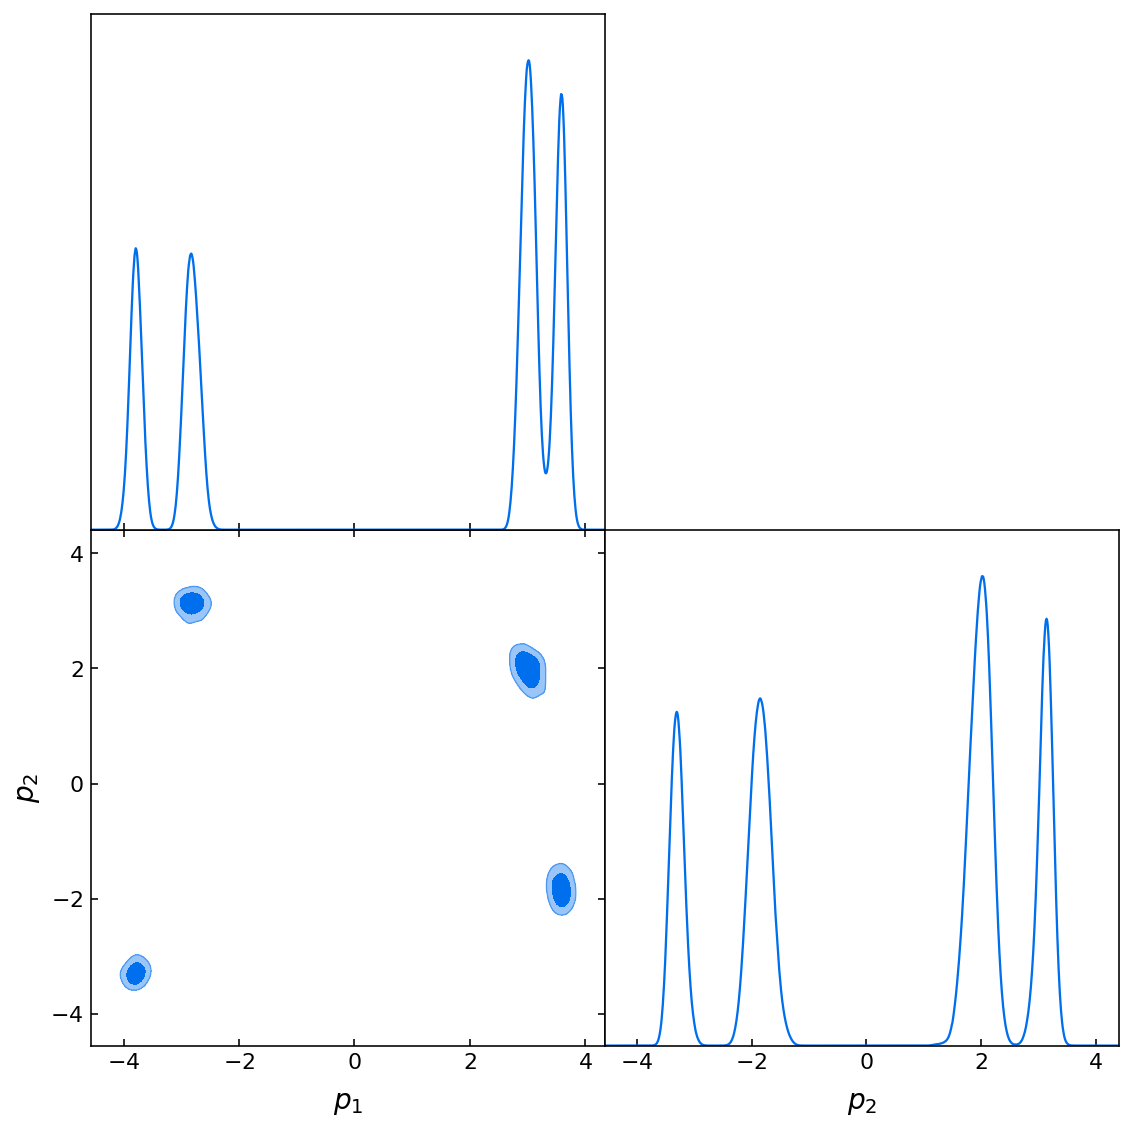

In [26]:
g = plots.getSubplotPlotter(width_inch=8)
g.triangle_plot(mc, filled=True)

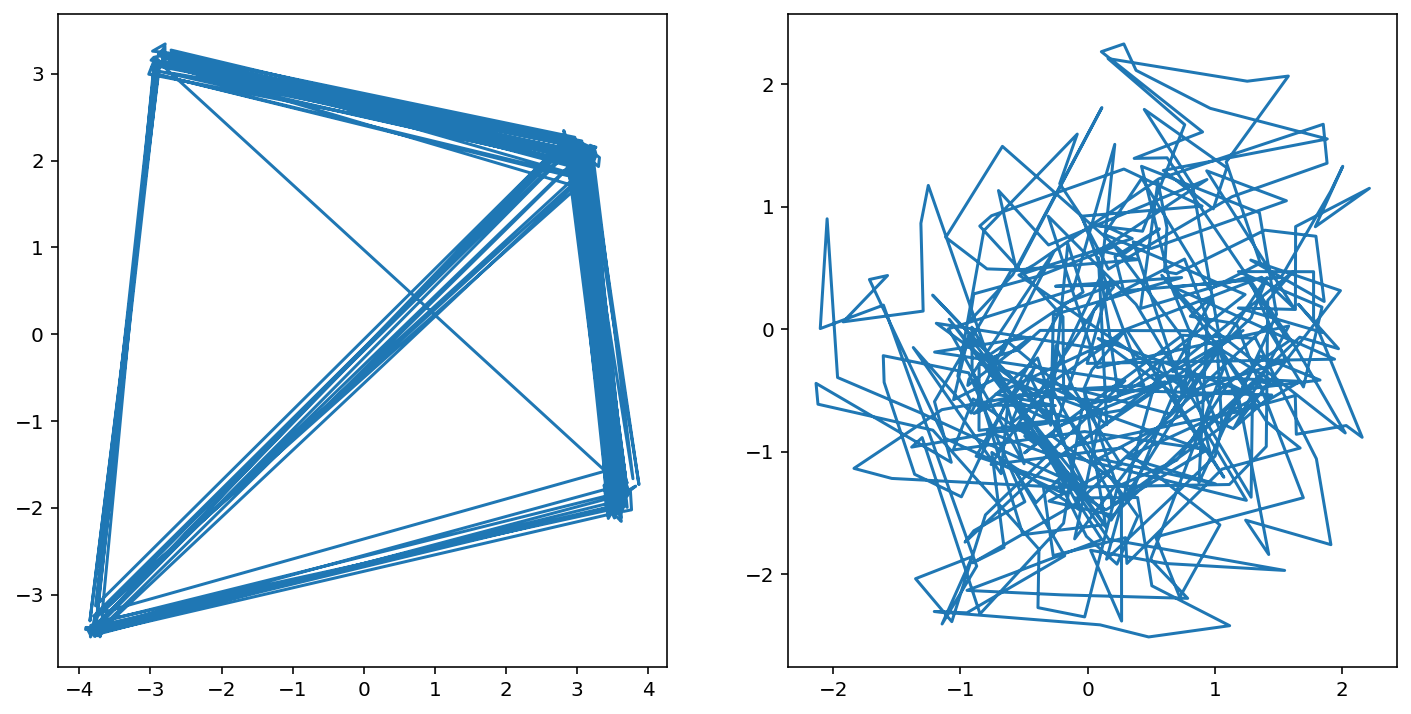

In [27]:
fig, ax = plt.subplots(1, 2, figsize=(12,6))
ax[0].plot(samples[0][0:1000,0], samples[0][0:1000,1])
ax[1].plot(latent_samples[0][0:1000,0], latent_samples[0][0:1000,1])
plt.show()